<a href="https://colab.research.google.com/github/effepivi/gvxr-tutorials/blob/main/set_mesh_from_array.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gvxr

In [2]:
import numpy as np # Who does not use Numpy?

import matplotlib # To plot images
import matplotlib.pyplot as plt # Plotting
from matplotlib.colors import LogNorm # Look up table
from matplotlib.colors import PowerNorm # Look up table

font = {'family' : 'serif',
        'size'   : 15
}
matplotlib.rc('font', **font)

from gvxrPython3 import gvxr # Simulate X-ray images

In [3]:
# Create an OpenGL context
print("Create an OpenGL context")
gvxr.createWindow(-1, False, "EGL", 4, 6);


Create an OpenGL context


In [4]:
# Create a source
print("Set up the beam")
gvxr.setSourcePosition(-40.0,  0.0, 0.0, "cm");
gvxr.usePointSource();
#  For a parallel source, use gvxr.useParallelBeam();

Set up the beam


In [5]:
# Set its spectrum, here a monochromatic beam
# 1000 photons of 80 keV (i.e. 0.08 MeV) per ray
gvxr.setMonoChromatic(0.08, "MeV", 1000);
# The following is equivalent: gvxr.setMonoChromatic(80, "keV", 1000);

In [6]:
# Set up the detector
print("Set up the detector");
gvxr.setDetectorPosition(10.0, 0.0, 0.0, "cm");
gvxr.setDetectorUpVector(0, 0, -1);
gvxr.setDetectorNumberOfPixels(640, 320);
gvxr.setDetectorPixelSize(0.5, 0.5, "mm");

Set up the detector


In [7]:
def createCuboid(aWidth: float,
                 aHeight: float,
                 aDepth: float):

    # Cache the half lengths
    half_width = aWidth / 2.0;
    half_height = aHeight / 2.0;
    half_depth = aDepth / 2.0;


    # Find the 8 corners

    # Top
    top_far_left = (  -half_width, half_height, -half_depth);
    top_near_left = ( -half_width, half_height,  half_depth);
    top_far_right = (  half_width, half_height, -half_depth);
    top_near_right = ( half_width, half_height,  half_depth);

    # Bottom
    bottom_far_left = (  top_far_left[0],   -top_far_left[1],   top_far_left[2]);
    bottom_near_left = ( top_near_left[0],  -top_near_left[1],  top_near_left[2]);
    bottom_far_right = ( top_far_right[0],  -top_far_right[1],  top_far_right[2]);
    bottom_near_right = (top_near_right[0], -top_near_right[1], top_near_right[2]);

    # Store vertices, normal vectors and indices
    p_vertex_set = [];
    p_index_set = [];

    # Vertices
    p_vertex_set.append(top_far_left[0]);
    p_vertex_set.append(top_far_left[1]);
    p_vertex_set.append(top_far_left[2]);

    p_vertex_set.append(top_near_left[0]);
    p_vertex_set.append(top_near_left[1]);
    p_vertex_set.append(top_near_left[2]);

    p_vertex_set.append(top_far_right[0]);
    p_vertex_set.append(top_far_right[1]);
    p_vertex_set.append(top_far_right[2]);

    p_vertex_set.append(top_near_right[0]);
    p_vertex_set.append(top_near_right[1]);
    p_vertex_set.append(top_near_right[2]);

    p_vertex_set.append(bottom_far_left[0]);
    p_vertex_set.append(bottom_far_left[1]);
    p_vertex_set.append(bottom_far_left[2]);

    p_vertex_set.append(bottom_near_left[0]);
    p_vertex_set.append(bottom_near_left[1]);
    p_vertex_set.append(bottom_near_left[2]);

    p_vertex_set.append(bottom_far_right[0]);
    p_vertex_set.append(bottom_far_right[1]);
    p_vertex_set.append(bottom_far_right[2]);

    p_vertex_set.append(bottom_near_right[0]);
    p_vertex_set.append(bottom_near_right[1]);
    p_vertex_set.append(bottom_near_right[2]);

    # Indices and normal vectors

    # Top face
    p_index_set.append(1);
    p_index_set.append(2);
    p_index_set.append(0);

    p_index_set.append(2);
    p_index_set.append(1);
    p_index_set.append(3);


    # Bottom face
    p_index_set.append(6);
    p_index_set.append(5);
    p_index_set.append(4);

    p_index_set.append(5);
    p_index_set.append(6);
    p_index_set.append(7);

    # Front face
    p_index_set.append(5);
    p_index_set.append(3);
    p_index_set.append(1);

    p_index_set.append(3);
    p_index_set.append(5);
    p_index_set.append(7);

    # Back face
    p_index_set.append(2);
    p_index_set.append(4);
    p_index_set.append(0);

    p_index_set.append(4);
    p_index_set.append(2);
    p_index_set.append(6);

    # Left face
    p_index_set.append(5);
    p_index_set.append(0);
    p_index_set.append(4);

    p_index_set.append(0);
    p_index_set.append(5);
    p_index_set.append(1);

    # Right face
    p_index_set.append(2);
    p_index_set.append(7);
    p_index_set.append(6);

    p_index_set.append(7);
    p_index_set.append(2);
    p_index_set.append(3);

    return p_vertex_set, p_index_set

In [30]:
# Empty the scenegraph. Note that it also empties the X-ray renderer from all its meshes.
gvxr.removePolygonMeshesFromSceneGraph();

In [31]:
# Create the mesh
vertices, indices = createCuboid(60, 30, 90);

gvxr.makeTriangularMesh("test sample",
        vertices, indices, "mm");

In [32]:
# Hounsfield unit: 0 == water
gvxr.setHU("test sample", 0);

In [33]:
# Add the sample to the simulation
gvxr.addPolygonMeshAsInnerSurface("test sample");

In [34]:
# Compute an X-ray image
# We convert the array in a Numpy structure and store the data using single-precision floating-point numbers.
x_ray_image = np.array(gvxr.computeXRayImage()).astype(np.single)

In [35]:
# Update the visualisation window
gvxr.displayScene()

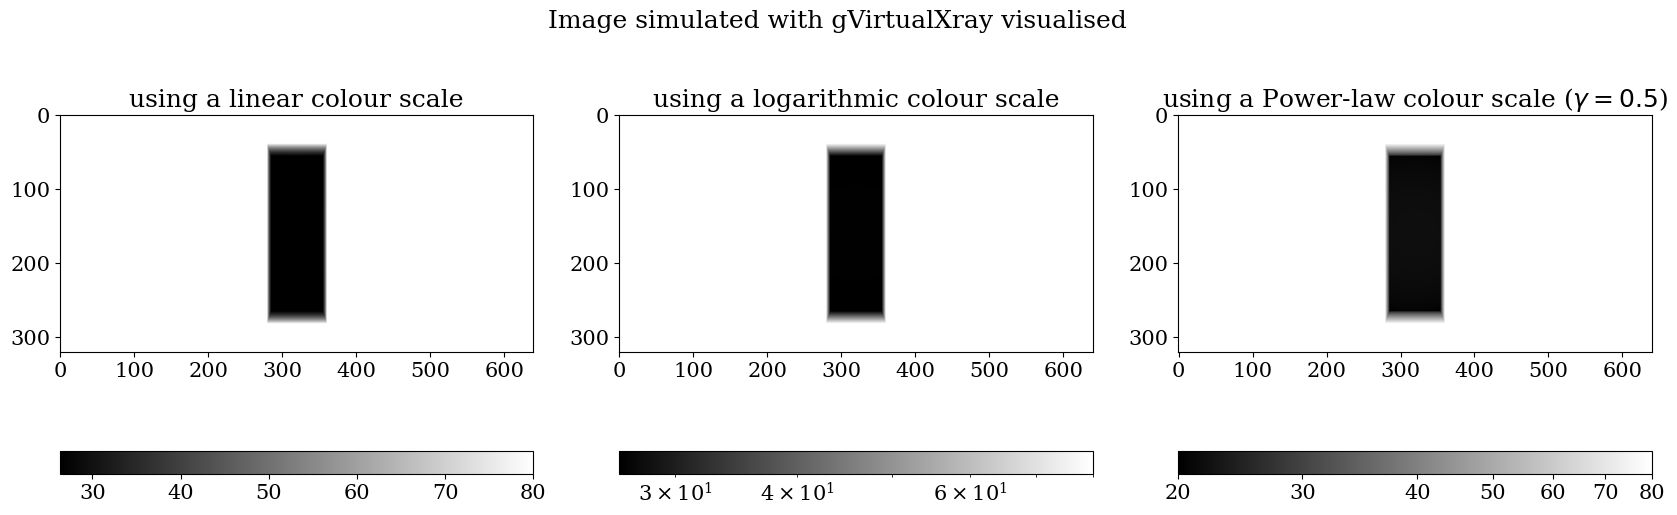

In [36]:
# Display the X-ray image and compare three different lookup tables
plt.figure(figsize=(17, 7.5))

plt.suptitle("Image simulated with gVirtualXray visualised", y=0.75)

plt.subplot(131)
plt.imshow(x_ray_image, cmap="gray")
plt.colorbar(orientation='horizontal')
plt.title("using a linear colour scale")

plt.subplot(132)
plt.imshow(x_ray_image, norm=LogNorm(), cmap="gray")
plt.colorbar(orientation='horizontal')
plt.title("using a logarithmic colour scale")

plt.subplot(133)
plt.imshow(x_ray_image, norm=PowerNorm(gamma=1./2.), cmap="gray")
plt.colorbar(orientation='horizontal');
plt.title("using a Power-law colour scale ($\gamma=0.5$)")

plt.tight_layout()

In [37]:
# Change the sample's colour
# By default the object is white, which is not always pretty. Let's change it to purple.
red = 102 / 255
green = 51 / 255
blue = 153 / 255
gvxr.setColour("test sample", red, green, blue, 1.0)

In [38]:
# This image can be used in a research paper to illustrate the simulation environment, in which case you may want to change the background colour to white with:
gvxr.setWindowBackGroundColour(1.0, 1.0, 1.0)

In [39]:
# Update the visualisation window
gvxr.displayScene()

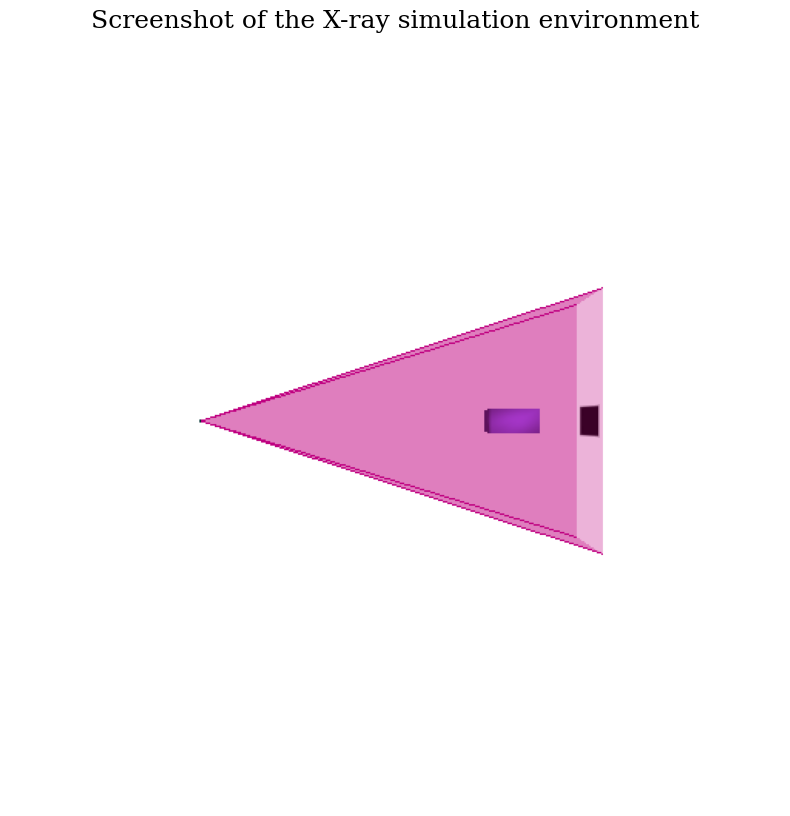

In [40]:
# Take the screenshot
screenshot = gvxr.takeScreenshot()
plt.figure(figsize=(10, 10))
plt.imshow(screenshot)
plt.title("Screenshot of the X-ray simulation environment")
plt.axis('off');
plt.show()